# Climate Modeling Tutorial

Project Drawdown has been experimenting with a modified version of an IPCC model called FaIR or the Finite Amplitude-Impulse Response Model. The use of FaIR is to model how the reduction in GHG emissions from implemented Drawdown solutions will lead to changes in atmospheric concentrations and ultimately global warming.

## FaIR Simple Climate Model Framework

FaIR is publicly available on Github (https://github.com/OMS-NetZero/FAIR) and contains its own peer-reviewed publication (https://gmd.copernicus.org/articles/11/2273/2018/).

In its current setup, FaIR v1.3 depicts a box model (inputs go into the box and outputs come out the box) for each greenhouse gas. Run on an annual time-step, the box model calculates the annual concentration as a balance between the emission sources and sinks. To calculate the sources, inputs of prescribed annual global emissions are converted into an equivalent increase in the atmospheric concentration. To mimic the sink or mechanism that removes the GHG from the atmosphere, an exponential decay function is performed. 

When all the concentrations are determined, the model will calculate the energy imbalance or total radiative forcing. This is essentially determining how much energy flux coming from the sun is being trapped within our atmosphere by the greenhouse gases contained within it. A shift in the energy balance will cause the Earth’s average temperature to rise or fall. By modeling out to 2060 or even beyond, Project Drawdown can determine how much emission reductions from climate solutions can limit projected global warming.

Built into the model are emission scenarios widely used within the climate community. Developed for the use of the IPCC (Intergovernmental Panel on Climate Change) are the Representative Concentration Pathways (RCPs). The numbers associated with the naming convention indicate the total radiative forcing projected by the year 2100.

The four RCP scenarios are as follows:

    • RCP 3 (formerly RCP 2.6) - a very stringent emission pathway where emissions peak in 2020
    • RCP 4.5 - intermediate scenario where emissions peak around 2040
    • RCP 6.0 - intermediate scenario where emissions peak around 2080
    • RCP 8.5 - worst case scenario where emissions continue to rise past 2100




In [1]:
# If it is not already installed from the setup requirements, install the FaIR module:
# pip install fair

# Import modules we'll use later
from solution import factory
import pandas as pd
import numpy as np
import fair

# Setup our plotting options
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

# The "workhorse" of the FaIR python code is the "forward.py" 
# Let's take a very specific function, "fair_scm" built into forward.py and import it
from fair.forward import fair_scm

# Let's also import the Representative Concentration Pathway (RCP) Emissions
from fair.RCPs import rcp85

In [2]:
# Save the RCP8.5 emission scenario as a variable
emissions = rcp85.Emissions.emissions

# If you take a look into our new object, emissions, its a big array of 736 rows and 40 columns!
# The first column is year from 1765 to 2500. 
# The subsequent columns are emissions of greenhouse gases and other forcing agents.
# Just to focus on a few in "emissions":
    # Column 0: Year
    # Column 1: Fossil CO2 (Gt-C)
    # Column 2: Other CO2 (Gt-C)
    # Column 3: CH4 (Mt-CH4)
    # Column 4: N2O (Mt-N2O)
    
# Let's make this look nice in a dataframe:
rcpemissions = pd.DataFrame(emissions, index = range(1765,2501),
                                       columns=['Year','FossilCO2 (Gt-C)', 'OtherCO2 (Gt-C)', 'CH4 (Mt-CH4)',
                                                'N2O (Mt-N2O)', 'SOx (Mt-S)', 'CO (Mt-CO)', 'NMVOC (Mt)',
                                                'NOx (Mt-N)', 'BC (Mt)', 'OC (Mt)', 'NH3 (Mt-N)', 'CF4 (kt)',
                                                'C2F6 (kt)', 'C6F14 (kt)', 'HFC23 (kt)', 'HFC32 (kt)',
                                                'HFC43_10 (kt)', 'HFC125 (kt)', 'HFC134a (kt)', 'HFC143a (kt)',
                                                'HFC227ea (kt)', 'HFC245fa (kt)', 'SF6 (kt)', 'CFC_11 (kt)',
                                                'CFC_12 (kt)', 'CFC_113 (kt)','CFC_114 (kt)','CFC_115 (kt)',
                                                'CARB_TET (kt)', 'MCF (kt)', 'HCFC_22 (kt)', 'HCFC_141B (kt)',
                                                'HCFC_142B (kt)', 'HALON1211 (kt)', 'HALON1202 (kt)', 
                                                'HALON1301 (kt)', 'HALON2404 (kt)', 'CH3BR (kt)', 'CH3CL (kt)'])    
rcpemissions

,Year,FossilCO2 (Gt-C),OtherCO2 (Gt-C),CH4 (Mt-CH4),N2O (Mt-N2O),SOx (Mt-S),CO (Mt-CO),NMVOC (Mt),NOx (Mt-N),BC (Mt),...,MCF (kt),HCFC_22 (kt),HCFC_141B (kt),HCFC_142B (kt),HALON1211 (kt),HALON1202 (kt),HALON1301 (kt),HALON2404 (kt),CH3BR (kt),CH3CL (kt)
1765,1765.0,0.00300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,157.267,3100.211
1766,1766.0,0.00300,0.005338,1.963262,0.005191,0.098883,9.050221,1.596875,0.109502,0.106998,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,157.267,3100.211
1767,1767.0,0.00300,0.010677,2.436448,0.010117,0.116306,12.960844,2.292316,0.168038,0.133383,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,157.267,3100.211
1768,1768.0,0.00300,0.016015,2.911105,0.015043,0.133811,16.876539,2.988648,0.226625,0.159847,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,157.267,3100.211
1769,1769.0,0.00300,0.021353,3.387278,0.019969,0.151398,20.797465,3.685897,0.285264,0.186393,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,157.267,3100.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496.0,1.49520,0.000000,922.990320,13.344000,12.856400,690.283200,176.239600,26.241600,4.249600,...,0.0,0.0,0.002,0.0,0.0,0.0,0.008,0.0,160.316,3511.082
2497,2497.0,1.49255,0.000000,923.041410,13.344000,12.856400,690.283200,176.239600,26.241600,4.249600,...,0.0,0.0,0.002,0.0,0.0,0.0,0.008,0.0,160.328,3511.082
2498,2498.0,1.48990,0.000000,923.092510,13.344000,12.856400,690.283200,176.239600,26.241600,4.249600,...,0.0,0.0,0.002,0.0,0.0,0.0,0.008,0.0,160.339,3511.082
2499,2499.0,1.48725,0.000000,923.143600,13.344000,12.856400,690.283200,176.239600,26.241600,4.249600,...,0.0,0.0,0.002,0.0,0.0,0.0,0.008,0.0,160.351,3511.082


## In Depth: How the Climate Model Works

"Behind the curtain" of the fair_scm function a lot of calculations are occuring. Emissions are being converted over to increased concentrations. And then concentrations are depleted on and annual timestep as "sinks" uptake and reduce atmospheric constituents. On each timestep, the radiative forcing or "efficiency at absorbing heat" is being calculated for each ghg or species. Once the radiative forcing is calculated for the 39 species, they are aggreagated as a total radiative forcing. The last step calculates the global atmospheric temperature from the total forcing.

A few cool features are built into the FaIR model. For one, the carbon cycle is temperature sensitive. As more CO2 stays in the atmosphere, it causes global temperatures to rise. But the higher temperatures weaken the carbon sinks of the ocean and land. It becomes harder for the ocean and vegetation on the land to absorb/sequester CO2. The FaIR model captures this "positive" feedback

A second cool feature is the FaIR model is tuned to replicate historic observations of concentrations and global temperature.

And third, it prescribes natural emissions of methane and nitrous oxide. Although, the natural emissions timeseries are slightly unusual and unrealistic as they calculated them back from the balance of concentration observations and prescribed historical anthropogenic emissions. This is worth noting as the developers are aware of the flawed assumptions.

In [3]:
# Now the magic happens in one single line! We input the emissions data into the "fair_scm" function

C,F,T = fair_scm(emissions=emissions)

# The outputs are a tuple of (C, F, T) arrays
    # C: Concentrations (nt, 31) in multigas mode
        # Column 0: CO2 ppm
        # Column 1: CH4 ppb
        # Column 2: N2O pbb
        # For other columns see: https://github.com/OMS-NetZero/FAIR
    # F: Radiative forcing (nt, 13) in Watts per meter squared
    # T: Temperature change anomaly (nt,) in Celsius

In [4]:
# Concentrations Results from FaIR climate model running RCP8.5 emission scenario

# Units: 
# CO2 parts per million (ppm), 
# CH4 parts per billion (pbb), 
# N2O (ppb)

result1 = pd.DataFrame({'CO2(ppm)': C[:,0,], 'CH4(ppb)': C[:,1,], 'N2O(ppb)': C[:,2,]}, index=rcp85.Emissions.year)
result1.index.name="Year"
result1

,CO2(ppm),CH4(ppb),N2O(ppb)
Year,,,
1765.0,278.001409,722.000000,273.000000
1766.0,278.004965,722.350809,273.011271
1767.0,278.010260,723.056226,273.033920
1768.0,278.017130,723.744603,273.056187
1769.0,278.025482,724.412011,273.078114
...,...,...,...
2496.0,2149.864676,3840.093910,545.311883
2497.0,2150.062157,3840.270377,545.321181
2498.0,2150.258722,3840.446825,545.330402


In [5]:
# Radiative Forcing Results from FaIR climate model running RCP8.5 emission scenario

# Units: Watts per meter-squared (Wm-2)

result2 = pd.DataFrame({'CO2(Wm-2)': F[:,0,], 'CH4(Wm-2)': F[:,1,], 'N2O(Wm-2)': F[:,2,], 'others(Wm-2)': np.sum(F, axis=1)-F[:,0,]-F[:,1,]-F[:,2,], 'total(Wm-2)': np.sum(F, axis=1)}, index=rcp85.Emissions.year)
result2.index.name="Year"
result2

,CO2(Wm-2),CH4(Wm-2),N2O(Wm-2),others(Wm-2),total(Wm-2)
Year,,,,,
1765.0,0.000026,0.000000,0.000000,0.049674,0.049700
1766.0,0.000092,0.000260,0.000038,0.056910,0.057300
1767.0,0.000191,0.000782,0.000115,0.067636,0.068725
1768.0,0.000319,0.001292,0.000191,0.118351,0.120153
1769.0,0.000474,0.001786,0.000266,0.150903,0.153429
...,...,...,...,...,...
2496.0,11.540672,1.287395,0.668100,0.466668,13.962835
2497.0,11.541118,1.287442,0.668111,0.466699,13.963370
2498.0,11.541562,1.287489,0.668122,0.466730,13.963903


In [6]:
# Temperature Results from FaIR climate model running RCP8.5 emission scenario

# Units: Degree Celsius (C)

result3 = pd.DataFrame({'TempAnomaly(C)': T}, index=rcp85.Emissions.year)
result3.index.name="Year"
result3

,TempAnomaly(C)
Year,
1765.0,0.005061
1766.0,0.009262
1767.0,0.013629
1768.0,0.021750
1769.0,0.031184
...,...
2496.0,9.535689
2497.0,9.539440
2498.0,9.543175


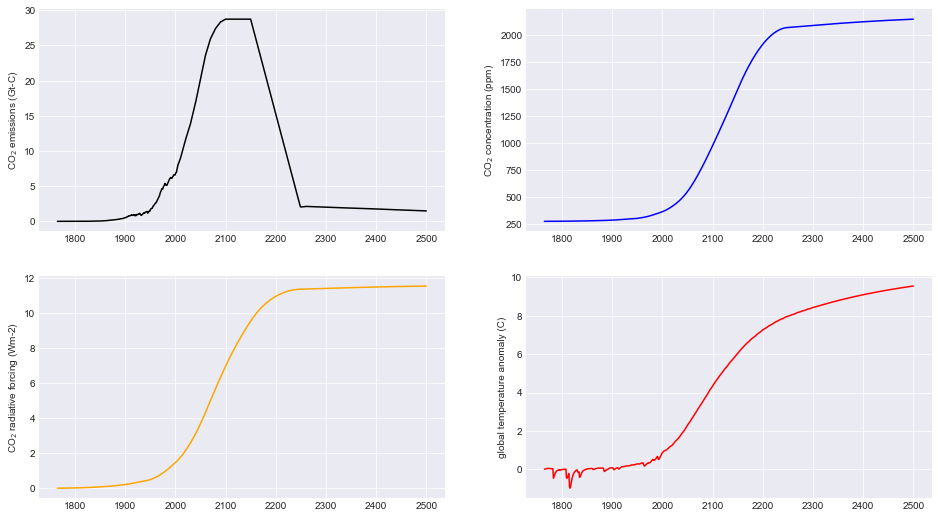

In [7]:
# Okay so let's have fun and make a plot of the FaIR outputs (C,F,T) for the RCP8.5 scenario.

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(rcpemissions.index, rcpemissions.iloc[:,1], color='black')
ax1.set_ylabel('CO$_2$ emissions (Gt-C)')
ax2 = fig.add_subplot(222)
ax2.plot(result1.index, result1.iloc[:,0],  color='blue')
ax2.set_ylabel('CO$_2$ concentration (ppm)')
ax3 = fig.add_subplot(223)
ax3.plot(result2.index, result2.iloc[:,0],  color='orange')
ax3.set_ylabel('CO$_2$ radiative forcing (Wm-2)')
ax4 = fig.add_subplot(224)
ax4.plot(result3.index, result3.iloc[:,0],  color='red')
ax4.set_ylabel('global temperature anomaly (C)');

## Sending the Solution Emission Reductions to the FaIR Model

Now that we've practiced using the FaIR model, let's put it to use for Project Drawdown purposes. We want to know how much of an impact our solutions make on the global greenhouse gas concentrations and global temperature. To do this, we will subtract out our emission reductions from the baseline RCP scenario. This will give us a scenario that includes our solution implementation. Then we'll simply run FaIR for the two scenarios; the baseline (no solution implmentation) and the solution scenario.


In [8]:
# The factory module has several ways of constructing solutions and scenarios.
# The simplest is to get the most recent Project Drawdown Scenario (PDS) of a particular type 
# for a particular solution.

# We will load the first conservative Project Drawdown Scenario (PDS1) of an industry-based solution, 
# let's load the refrigerants solution.

refrigerants_pds1 = factory.solution_pds_type("refrigerants", "PDS1")

In [9]:
#For demonstration purposes we will chose the RCP8.5 scenario as a baseline emission scenario. 
#To load the scenario and run it through the FaIR model we will use:

baseline = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()

#Within this variable that we’ve called “baseline”, there are 4 essential results. 
# Essentially, the output is a data frame for the global mean concentration of greenhouse gases “C”, 
# radiative forcing “F”, and temperature “T”. As well as, the emission scenario, “E”.

# We can save each of these results as its own variable for easy access:
C85_base = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[0]
F85_base = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[1]
T85_base = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[2]
E85_base = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[3]

In [10]:
# Now that we have the baseline emission scenario, we want to compare it to our Project Drawdown 
# emission reductions. We can create a reduction scenario by subtracting the emission reductions 
# for CO2, CH4, and N2O from the total emissions in our baseline scenario. 

# The command that will run our reduction scenario in FaIR to produce our climate results is:
reduction = refrigerants_pds1.c2.FaIR_CFT_Drawdown_RCP85()

# Again, the output will have concentration, radiative forcing, temperature, and global emissions.
C85_pds1 = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[0]
F85_pds1 = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[1]
T85_pds1 = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[2]
E85_pds1 = refrigerants_pds1.c2.FaIR_CFT_baseline_RCP85()[3]

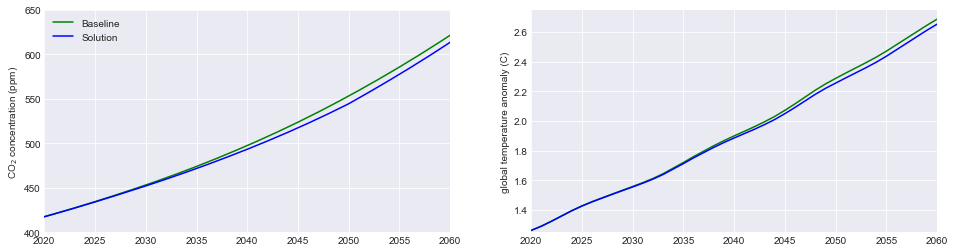

In [11]:
# Let's plot our results to see the impact of reducing our use of damaging refridgerants!
# Check that out! A single solution can make an impact globally! Imagine what all of the solutions could do!

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(C85_base.index,C85_base['CO2(ppm)'], c = "green", label="Baseline")
ax1.plot(C85_pds1.index,C85_pds1['CO2(ppm)'], c = "blue",  label="Solution")
ax1.set_ylabel('CO$_2$ concentration (ppm)')
ax1.set_xlim([2020, 2060])
ax1.set_ylim([400, 650])
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(222)
ax2.plot(T85_base.index,T85_base['TempAnomaly(C)'], c = "green", label="Baseline")
ax2.plot(T85_pds1.index,T85_pds1['TempAnomaly(C)'], c = "blue",  label="Solution")
ax2.set_ylabel('global temperature anomaly (C)')
ax2.set_xlim([2020, 2060])
ax2.set_ylim([1.25, 2.75]);
